In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflowA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential,datasets,models
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,AveragePooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data

Used brazilian dataset that has 200 distinct faces ,with two frontal images for each face and 14 different orientation images for each faces.

In [ ]:

#Path to the folder containing the images
folder_path = "/content/drive/MyDrive/project/dataset_orient"

#List to store image arrays and IDs
image_data = []
image_ids = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        #Extract image ID from the filename
        image_id = filename.split("-")[0]

        #Construct the full path to the image file
        image_path = os.path.join(folder_path, filename)

        #Open the image and convert it to a numpy array
        img = Image.open(image_path)
        img_array = np.array(img)

        #Append image array and ID to the lists
        image_data.append(img_array)
        image_ids.append(image_id)


#Create a DataFrame
df = pd.DataFrame({'ID': image_ids, 'Image': image_data})


In [ ]:
#Shuffle the df
df = shuffle(df)

In [ ]:

second_folder_path = "/content/drive/MyDrive/project/dataset_front"

#List to store image arrays and IDs
image2_data = []
image2_ids = []
image3_data = []
image3_ids = []

for filename in os.listdir(second_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Extract image ID from the filename
        image_id = filename.split("a")[0].split('b')[0]

        # Construct the full path to the image file
        image_path = os.path.join(second_folder_path, filename)

        # Open the image and convert it to a numpy array
        img = Image.open(image_path)
        img_array = np.array(img)

        # Append image array and ID to the lists based on 'a' or 'b'
        if 'a' in filename:
            image2_data.append(img_array)
            image2_ids.append(image_id)
        elif 'b' in filename:
            image3_data.append(img_array)
            image3_ids.append(image_id)

# Create DataFrames
df2 = pd.DataFrame({'ID': image2_ids, 'Image': image2_data})
df3 = pd.DataFrame({'ID': image3_ids, 'Image': image3_data})

In [ ]:
df2 = shuffle(df2)
df3 = shuffle(df3)

In [ ]:
df.to_pickle('/content/drive/MyDrive/orient.pkl')

In [ ]:

df2.to_pickle('/content/drive/MyDrive/front.pkl')
df3.to_pickle('/content/drive/MyDrive/front_smile.pkl')

#Extract only faces

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.9 MB/s eta 0:00:00


In [ ]:
from skimage.transform import resize
from mtcnn import MTCNN
from PIL import Image

In [ ]:
# Load faces data from pickle file as DataFrame
df_faces_register = pd.read_pickle('/content/drive/MyDrive/front.pkl')
df_faces = pd.read_pickle('/content/drive/MyDrive/front_smile.pkl')

In [ ]:
# Initialize MTCNN for face detection
detector = MTCNN()
# Function to extract and resize faces
def extract_face_and_resize(img):
    # Detect faces
    faces = detector.detect_faces(img)
    if faces:
        # Extract the bounding box of the first detected face
        x, y, w, h = faces[0]['box']
        # Crop the face region
        face = img[y:y+h, x:x+w]
        # Resize the face to the desired shape
        face = Image.fromarray(face).resize((260, 360))
        # Convert to numpy array and ensure the size is (360, 260, 3)
        face = np.array(face)
        if face.shape == (360, 260, 3):
            return face
        else:
            return None
    else:
        return None


In [ ]:
# Apply the function to each image in the DataFrame
df_faces['face'] = df_faces['Image'].apply(extract_face_and_resize)
# Drop rows where no face is detected or the size is not correct
df_faces = df_faces.dropna(subset=['face'])

# Apply the function to each image in the DataFrame
df_faces_register['face'] = df_faces_register['Image'].apply(extract_face_and_resize)
# Drop rows where no face is detected or the size is not correct
df_faces_register = df_faces_register.dropna(subset=['face'])

In [ ]:
df_faces

,ID,Image,face
105,107,"[[[170, 177, 183], [168, 175, 181], [166, 173,...","[[[60, 64, 67], [53, 55, 59], [42, 42, 46], [3..."
84,77,"[[[208, 208, 208], [210, 210, 210], [211, 211,...","[[[39, 30, 23], [37, 29, 22], [34, 28, 21], [3..."
122,116,"[[[179, 179, 179], [179, 179, 179], [180, 180,...","[[[178, 178, 178], [179, 179, 179], [179, 179,..."
29,29,"[[[192, 194, 191], [191, 193, 190], [191, 193,...","[[[58, 53, 49], [51, 45, 40], [45, 37, 30], [4..."
156,147,"[[[179, 183, 186], [180, 184, 187], [181, 185,...","[[[48, 39, 32], [46, 37, 30], [45, 36, 29], [4..."
...,...,...,...
115,114,"[[[208, 213, 216], [203, 208, 211], [205, 210,...","[[[44, 38, 38], [45, 39, 39], [44, 39, 37], [4..."
1,94,"[[[172, 177, 171], [169, 174, 168], [168, 173,...","[[[20, 21, 15], [18, 19, 13], [15, 16, 10], [1..."
76,54,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[13, 15, 12], [15, 16, 14], [16, 16, 14], [1..."
123,125,"[[[192, 192, 192], [193, 193, 193], [194, 194,...","[[[97, 74, 43], [98, 74, 43], [99, 74, 43], [9..."


In [ ]:
df_faces_register

,ID,Image,face
77,60,"[[[194, 194, 192], [195, 195, 193], [195, 195,...","[[[37, 32, 28], [37, 32, 28], [35, 31, 26], [3..."
171,166,"[[[203, 203, 203], [202, 202, 202], [202, 202,...","[[[123, 96, 51], [125, 99, 53], [134, 106, 63]..."
107,105,"[[[207, 208, 203], [209, 210, 205], [212, 213,...","[[[64, 58, 44], [66, 60, 48], [67, 59, 50], [6..."
23,11,"[[[196, 196, 196], [196, 196, 196], [194, 194,...","[[[41, 32, 25], [41, 32, 23], [40, 31, 20], [3..."
169,173,"[[[202, 202, 200], [201, 201, 199], [201, 201,...","[[[77, 63, 53], [75, 62, 48], [73, 61, 44], [7..."
...,...,...,...
2,98,"[[[204, 204, 204], [203, 203, 203], [202, 202,...","[[[179, 181, 178], [180, 182, 179], [183, 185,..."
42,24,"[[[190, 192, 189], [190, 192, 189], [191, 193,...","[[[188, 190, 185], [190, 192, 187], [190, 191,..."
186,193,"[[[172, 174, 171], [172, 174, 171], [171, 173,...","[[[173, 175, 164], [167, 169, 160], [164, 168,..."
148,149,"[[[202, 207, 201], [202, 207, 201], [200, 205,...","[[[54, 47, 37], [53, 46, 36], [53, 45, 35], [5..."


In [ ]:
df_faces.to_pickle("/content/drive/MyDrive/frontal_face.pkl")
df_faces_register.to_pickle("/content/drive/MyDrive/face_register.pkl")


#Test data with 15 % occulusion
Will apply 15 % occlusion on the frontal smile faces.

In [ ]:
df=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')
df_central=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')
df_left=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')
df_right=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')

## Center occlusion

In [ ]:
occlusion_size=(120, 120)
constant=0
def central_occlusion(image_array):
    height,width,_=image_array.shape
    h,w=occlusion_size
    top=(height-h)//2
    left=(width-w)//2
    bottom=top+h
    right=left+w
    image_array[top:bottom,left:right,:]=constant
    return image_array

In [ ]:
df_central['face'] =df_central['face'].apply(central_occlusion)

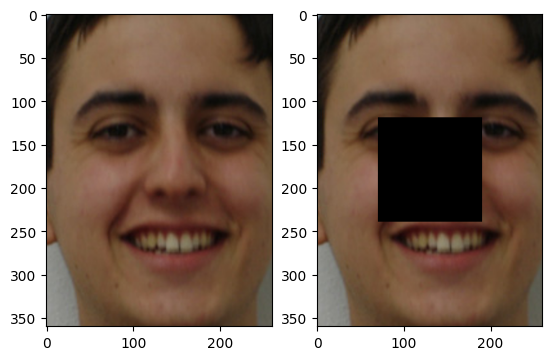

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_central.loc[0,'face'])

##peripheral_occlusion

###Left peripheral_occlusion

In [ ]:
occlusion_size=(150,100)
constant=0
def left_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  left = 40
  bottom = top + h
  right = left + w
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_left['face'] =df_left['face'].apply(left_peripheral_occlusion)

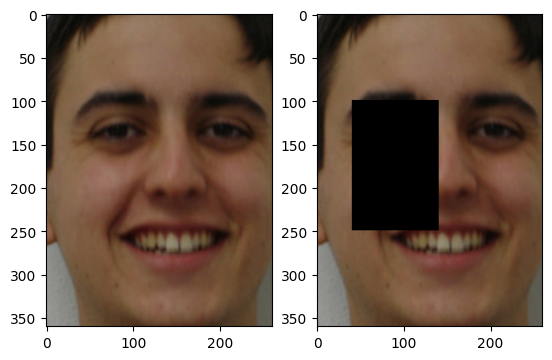

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_left.loc[0,'face'])

###Right peripheral_occlusion

In [ ]:
occlusion_size=(150,100)
constant=0
def right_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  right = width - 40
  left = right - w
  bottom = top + h
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_right['face'] =df_right['face'].apply(right_peripheral_occlusion)

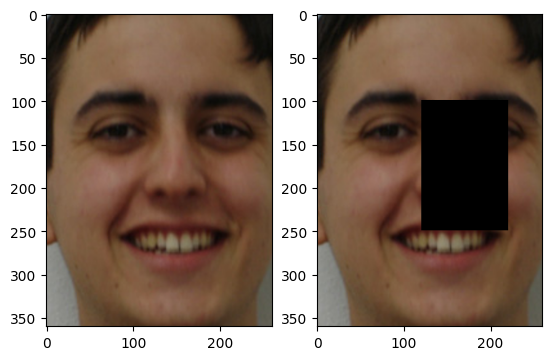

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_right.loc[0,'face'])

In [ ]:
df_left

,ID,Image,face
174,79,"[[[193, 195, 194], [193, 195, 194], [190, 192,...","[[[124, 112, 86], [118, 105, 78], [109, 94, 65..."
362,181,"[[[193, 193, 193], [195, 195, 195], [197, 197,...","[[[176, 178, 177], [179, 180, 181], [183, 183,..."
185,70,"[[[255, 255, 253], [255, 255, 253], [255, 255,...","[[[182, 187, 190], [184, 189, 192], [186, 190,..."
228,110,"[[[177, 178, 173], [175, 176, 171], [175, 175,...","[[[27, 23, 24], [30, 25, 25], [34, 28, 28], [3..."
343,166,"[[[203, 203, 203], [202, 202, 202], [202, 202,...","[[[123, 96, 51], [125, 99, 53], [134, 106, 63]..."
...,...,...,...
111,44,"[[[180, 180, 180], [176, 176, 176], [173, 173,...","[[[157, 161, 164], [156, 160, 169], [137, 140,..."
340,173,"[[[202, 202, 200], [201, 201, 199], [201, 201,...","[[[77, 63, 53], [75, 62, 48], [73, 61, 44], [7..."
323,177,"[[[199, 199, 197], [196, 196, 194], [191, 191,...","[[[188, 189, 184], [186, 187, 182], [189, 189,..."
163,74,"[[[178, 186, 189], [179, 187, 190], [178, 186,...","[[[33, 26, 20], [32, 24, 20], [29, 23, 19], [2..."


In [ ]:
df_central.to_pickle("/content/drive/MyDrive/central_occ.pkl")
df_left.to_pickle("/content/drive/MyDrive/left_occ.pkl")
df_right.to_pickle("/content/drive/MyDrive/right_occ.pkl")

#Test data with 5 % occulusion
Will apply 5 % occlusion on the frontal smile faces.

In [ ]:
df=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')
df_central=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')
df_left=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')
df_right=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')

## Center occlusion

In [ ]:
occlusion_size=(70, 70)
constant=0
def central_occlusion(image_array):
    height,width,_=image_array.shape
    h,w=occlusion_size
    top=(height-h)//2
    left=(width-w)//2
    bottom=top+h
    right=left+w
    image_array[top:bottom,left:right,:]=constant
    return image_array

In [ ]:
df_central['face'] =df_central['face'].apply(central_occlusion)

In [ ]:
df_central=pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')

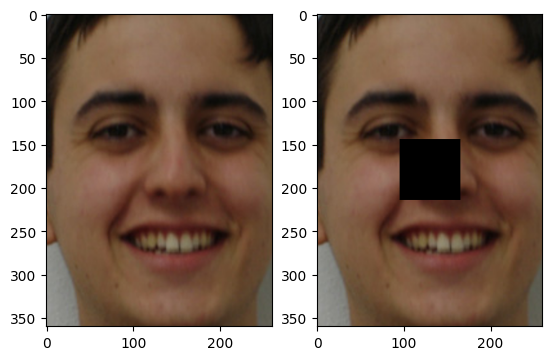

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_central.loc[0,'face'])

##peripheral_occlusion

###Left peripheral_occlusion

In [ ]:
occlusion_size=(80,60)
constant=0
def left_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  left = 40
  bottom = top + h
  right = left + w
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_left['face'] =df_left['face'].apply(left_peripheral_occlusion)

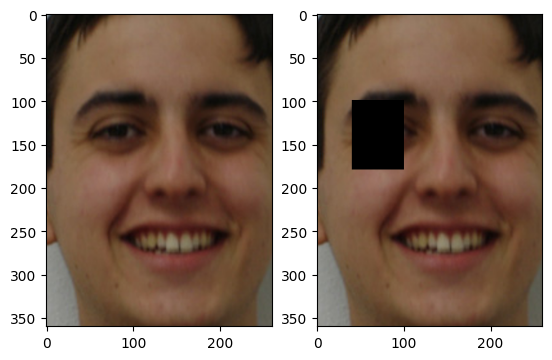

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_left.loc[0,'face'])

###Right peripheral_occlusion

In [ ]:
occlusion_size=(80,60)
constant=0
def right_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  right = width - 40
  left = right - w
  bottom = top + h
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_right['face'] =df_right['face'].apply(right_peripheral_occlusion)

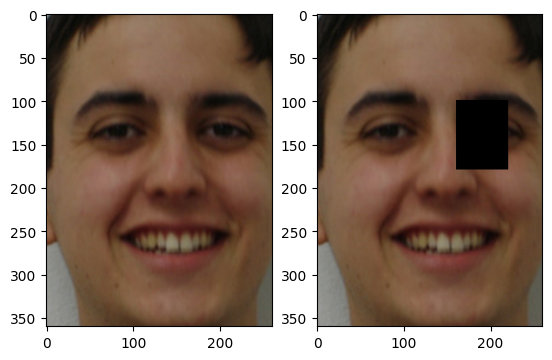

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_right.loc[0,'face'])

In [ ]:
df_left

,ID,Image,face
174,79,"[[[193, 195, 194], [193, 195, 194], [190, 192,...","[[[124, 112, 86], [118, 105, 78], [109, 94, 65..."
362,181,"[[[193, 193, 193], [195, 195, 195], [197, 197,...","[[[176, 178, 177], [179, 180, 181], [183, 183,..."
185,70,"[[[255, 255, 253], [255, 255, 253], [255, 255,...","[[[182, 187, 190], [184, 189, 192], [186, 190,..."
228,110,"[[[177, 178, 173], [175, 176, 171], [175, 175,...","[[[27, 23, 24], [30, 25, 25], [34, 28, 28], [3..."
343,166,"[[[203, 203, 203], [202, 202, 202], [202, 202,...","[[[123, 96, 51], [125, 99, 53], [134, 106, 63]..."
...,...,...,...
111,44,"[[[180, 180, 180], [176, 176, 176], [173, 173,...","[[[157, 161, 164], [156, 160, 169], [137, 140,..."
340,173,"[[[202, 202, 200], [201, 201, 199], [201, 201,...","[[[77, 63, 53], [75, 62, 48], [73, 61, 44], [7..."
323,177,"[[[199, 199, 197], [196, 196, 194], [191, 191,...","[[[188, 189, 184], [186, 187, 182], [189, 189,..."
163,74,"[[[178, 186, 189], [179, 187, 190], [178, 186,...","[[[33, 26, 20], [32, 24, 20], [29, 23, 19], [2..."


In [ ]:
df_central.to_pickle("/content/drive/MyDrive/central_occ5.pkl")
df_left.to_pickle("/content/drive/MyDrive/left_occ5.pkl")
df_right.to_pickle("/content/drive/MyDrive/right_occ5.pkl")

#Test data with 15 % occulusion with orientation
We will apply occlusions on the different orientation images.

In [ ]:
df=pd.read_pickle('/content/drive/MyDrive/orientation_set.pkl')
df_central=pd.read_pickle('/content/drive/MyDrive/orientation_set.pkl')
df_left=pd.read_pickle('/content/drive/MyDrive/orientation_set.pkl')
df_right=pd.read_pickle('/content/drive/MyDrive/orientation_set.pkl')

## Center occlusion

In [ ]:
occlusion_size=(120, 120)
constant=0
def central_occlusion(image_array):
    height,width,_=image_array.shape
    h,w=occlusion_size
    top=(height-h)//2
    left=(width-w)//2
    bottom=top+h
    right=left+w
    image_array[top:bottom,left:right,:]=constant
    return image_array

In [ ]:
df_central['face'] =df_central['face'].apply(central_occlusion)

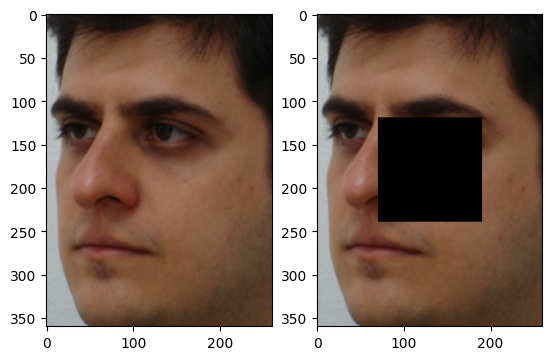

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_central.loc[0,'face'])

##peripheral_occlusion

###Left peripheral_occlusion

In [ ]:
occlusion_size=(150,100)
constant=0
def left_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  left = 40
  bottom = top + h
  right = left + w
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_left['face'] =df_left['face'].apply(left_peripheral_occlusion)

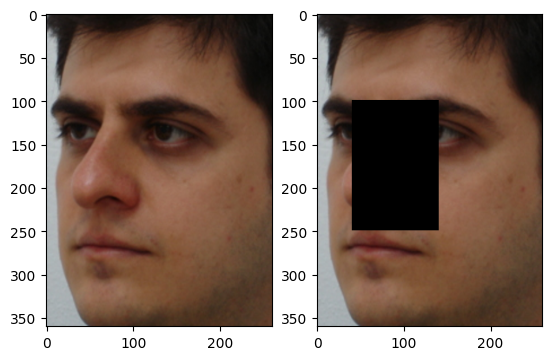

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_left.loc[0,'face'])

###Right peripheral_occlusion

In [ ]:
occlusion_size=(150,100)
constant=0
def right_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  right = width - 40
  left = right - w
  bottom = top + h
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_right['face'] =df_right['face'].apply(right_peripheral_occlusion)

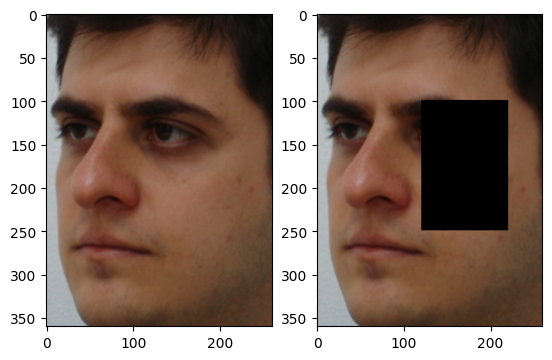

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_right.loc[0,'face'])

In [ ]:
df_left

,ID,Image,face
174,79,"[[[193, 195, 194], [193, 195, 194], [190, 192,...","[[[124, 112, 86], [118, 105, 78], [109, 94, 65..."
362,181,"[[[193, 193, 193], [195, 195, 195], [197, 197,...","[[[176, 178, 177], [179, 180, 181], [183, 183,..."
185,70,"[[[255, 255, 253], [255, 255, 253], [255, 255,...","[[[182, 187, 190], [184, 189, 192], [186, 190,..."
228,110,"[[[177, 178, 173], [175, 176, 171], [175, 175,...","[[[27, 23, 24], [30, 25, 25], [34, 28, 28], [3..."
343,166,"[[[203, 203, 203], [202, 202, 202], [202, 202,...","[[[123, 96, 51], [125, 99, 53], [134, 106, 63]..."
...,...,...,...
111,44,"[[[180, 180, 180], [176, 176, 176], [173, 173,...","[[[157, 161, 164], [156, 160, 169], [137, 140,..."
340,173,"[[[202, 202, 200], [201, 201, 199], [201, 201,...","[[[77, 63, 53], [75, 62, 48], [73, 61, 44], [7..."
323,177,"[[[199, 199, 197], [196, 196, 194], [191, 191,...","[[[188, 189, 184], [186, 187, 182], [189, 189,..."
163,74,"[[[178, 186, 189], [179, 187, 190], [178, 186,...","[[[33, 26, 20], [32, 24, 20], [29, 23, 19], [2..."


In [ ]:
df_central.to_pickle("/content/drive/MyDrive/central_occ_o.pkl")
df_left.to_pickle("/content/drive/MyDrive/left_occ_o.pkl")
df_right.to_pickle("/content/drive/MyDrive/right_occ_o.pkl")

#Register data with occulusion
We need data for creating register with occlusion faces.Here we will apply all the type of occlusions on the frontal faces.

In [ ]:
df=pd.read_pickle('/content/drive/MyDrive/face_register.pkl')
df_central=pd.read_pickle('/content/drive/MyDrive/face_register.pkl')
df_left=pd.read_pickle('/content/drive/MyDrive/face_register.pkl')
df_right=pd.read_pickle('/content/drive/MyDrive/face_register.pkl')

## Center occlusion

In [ ]:
occlusion_size=(120, 120)
constant=0
def central_occlusion(image_array):
    height,width,_=image_array.shape
    h,w=occlusion_size
    top=(height-h)//2
    left=(width-w)//2
    bottom=top+h
    right=left+w
    image_array[top:bottom,left:right,:]=constant
    return image_array

In [ ]:
df_central['face'] =df_central['face'].apply(central_occlusion)

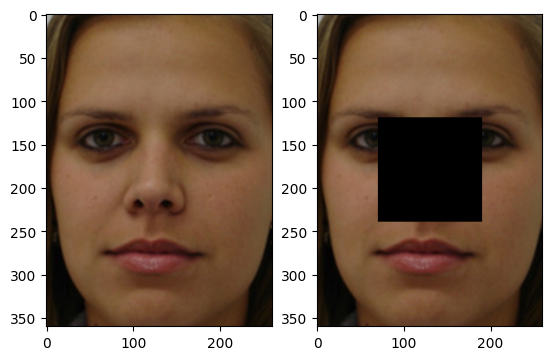

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_central.loc[0,'face'])

##peripheral_occlusion

###Left peripheral_occlusion

In [ ]:
occlusion_size=(150,100)
constant=0
def left_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  left = 40
  bottom = top + h
  right = left + w
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_left['face'] =df_left['face'].apply(left_peripheral_occlusion)

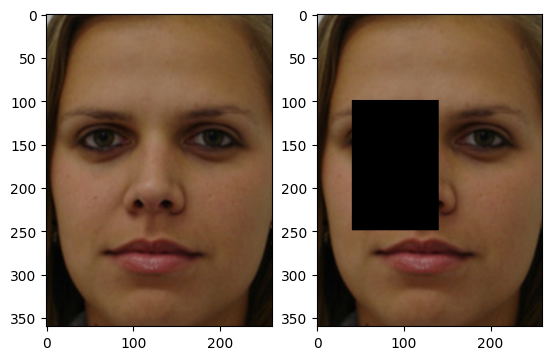

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_left.loc[0,'face'])

###Right peripheral_occlusion

In [ ]:
occlusion_size=(150,100)
constant=0
def right_peripheral_occlusion(image_array):
  height, width, _ = image_array.shape
  h, w = occlusion_size
  top = 100
  right = width - 40
  left = right - w
  bottom = top + h
  image_array[top:bottom, left:right, :] = constant
  return image_array

In [ ]:
df_right['face'] =df_right['face'].apply(right_peripheral_occlusion)

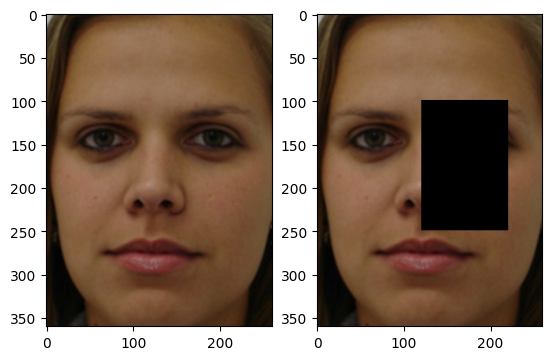

In [ ]:
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'face'])
plt.subplot(1,2,2)
plt.imshow(df_right.loc[0,'face'])

In [ ]:
df_left

,ID,Image,face
174,79,"[[[193, 195, 194], [193, 195, 194], [190, 192,...","[[[124, 112, 86], [118, 105, 78], [109, 94, 65..."
362,181,"[[[193, 193, 193], [195, 195, 195], [197, 197,...","[[[176, 178, 177], [179, 180, 181], [183, 183,..."
185,70,"[[[255, 255, 253], [255, 255, 253], [255, 255,...","[[[182, 187, 190], [184, 189, 192], [186, 190,..."
228,110,"[[[177, 178, 173], [175, 176, 171], [175, 175,...","[[[27, 23, 24], [30, 25, 25], [34, 28, 28], [3..."
343,166,"[[[203, 203, 203], [202, 202, 202], [202, 202,...","[[[123, 96, 51], [125, 99, 53], [134, 106, 63]..."
...,...,...,...
111,44,"[[[180, 180, 180], [176, 176, 176], [173, 173,...","[[[157, 161, 164], [156, 160, 169], [137, 140,..."
340,173,"[[[202, 202, 200], [201, 201, 199], [201, 201,...","[[[77, 63, 53], [75, 62, 48], [73, 61, 44], [7..."
323,177,"[[[199, 199, 197], [196, 196, 194], [191, 191,...","[[[188, 189, 184], [186, 187, 182], [189, 189,..."
163,74,"[[[178, 186, 189], [179, 187, 190], [178, 186,...","[[[33, 26, 20], [32, 24, 20], [29, 23, 19], [2..."


In [ ]:
final_df = pd.concat([df, df_central, df_left , df_right])

#Shuffle the concatenated dataframe
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [ ]:
final_df.to_pickle("/content/drive/MyDrive/register_occ.pkl")

#Data for training

##Functions

In [ ]:
# Function to preprocess images
def preprocess_image(img):
    # Resize the image
    img = resize(img, (224, 224), anti_aliasing=True)
    img = img/255
    return img

In [ ]:
def prepare_target(ID):
  ID=int(ID)
  ID=register_faces_dict[ID]
  return ID

## Data for training one layer and then testing

In [ ]:
import pickle
with open('/content/drive/MyDrive/register_faces_dict_training.pkl', 'rb') as f:
     register_faces_dict = pickle.load(f)

In [ ]:
# Load test images from pickle file as DataFrame
df1 = pd.read_pickle('/content/drive/MyDrive/face_register.pkl')
df2 = pd.read_pickle('/content/drive/MyDrive/frontal_face.pkl')

In [ ]:
df1=pd.concat([df1,df2])

In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df1)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
X=X.apply(preprocess_image)

In [ ]:
X = np.stack(X.values)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y = np.stack(y.values)

###X_train and y_train





In [ ]:
np.save("/content/drive/MyDrive/X_train_fo.npy", X)
np.save("/content/drive/MyDrive/y_train_fo.npy", y)

###X_test and y_test for orientation

In [ ]:
# Function to preprocess images
def preprocess_image(img):
    # Resize the image
    img = resize(img, (224, 224), anti_aliasing=True)
    img = img/255
    return img

In [ ]:
def prepare_target(ID):
  ID=int(ID)
  return ID

In [ ]:
# Load test images from pickle file as DataFrame
df_test = pd.read_pickle('/content/drive/MyDrive/project/processed_dataset.pkl')

# Select 200 random test images
df_test_sample = df_test.sample(n=200, random_state=42)

In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df_test_sample)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.to_pickle('/content/drive/MyDrive/orientation_set.pkl')

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
print(X[1])

[[[ 78  79  83]
  [ 59  58  63]
  [ 35  34  37]
  ...
  [  8   8   8]
  [  8   8   8]
  [  8   8   8]]

 [[ 72  76  79]
  [ 62  64  68]
  [ 39  40  42]
  ...
  [  8   8   8]
  [  8   8   8]
  [  8   8   8]]

 [[ 58  60  64]
  [ 67  67  72]
  [ 52  52  54]
  ...
  [  7   7   7]
  [  8   8   8]
  [ 10  10  10]]

 ...

 [[175 179 183]
  [175 179 182]
  [174 179 183]
  ...
  [ 77  42  24]
  [ 78  43  24]
  [ 78  43  27]]

 [[175 178 183]
  [177 180 185]
  [176 180 184]
  ...
  [ 77  41  24]
  [ 78  43  26]
  [ 81  44  28]]

 [[175 178 183]
  [177 180 185]
  [177 181 184]
  ...
  [ 79  40  24]
  [ 81  42  28]
  [ 83  44  29]]]


In [ ]:
X=X.apply(preprocess_image)

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
X = np.stack(X.values)

In [ ]:
X.shape

(200, 224, 224, 3)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y.shape

(200,)

In [ ]:
y = np.stack(y.values)

In [ ]:
y.shape

(200,)

In [ ]:
y

array([ 14,  59,  43, 138, 166,  20, 146, 140,  74,  86, 105, 181, 183,
       180,  96, 199,  75, 188,  55, 129,  34, 148,  76, 126,  98, 156,
        19,  34,  69, 103, 151,  64,  25,  65,  65,  17, 139,  86,  74,
        68, 111, 182,  28, 169, 138, 113, 192, 130,  80, 125, 108,  52,
        64,  75,  99,  65, 167,  32, 159, 166, 173, 133,  53, 190,   5,
       140,  50,  91,  45,  70,  58,   3,  91,  27,  81,  19, 128,  63,
         3,  47,  67, 182,  27, 152,  13, 161,  66,  15,  93, 136, 186,
         5, 128,  48, 157,  88, 155, 136, 163, 126,  85,  35,  74,   1,
        80, 175,  66,   4, 105,  94, 117,  65, 198,  87, 117, 137,  37,
       200, 187,  14, 101, 112, 160, 102, 164, 200,  44,  28,  95, 171,
         4,  58,  66, 153, 171,  25, 117,  47, 145, 126,  41, 118, 154,
       187, 108,  60,  82, 121, 103, 160,  47,  13,  70, 152,  86,  11,
        72, 151,  59, 112, 146,  42,   5,  17,  62,  61,  64,  41, 181,
        70,  97, 177,   9, 168, 131, 172,  47, 196,  95, 195, 12

In [ ]:
np.save("/content/drive/MyDrive/X_test_o.npy", X)
np.save("/content/drive/MyDrive/y_test_o.npy", y)

###X_test and y_test for central occlusion

In [ ]:
# Load test images from pickle file as DataFrame
df_central=pd.read_pickle("/content/drive/MyDrive/central_occ.pkl")


In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df_central)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
X=X.apply(preprocess_image)

In [ ]:
X = np.stack(X.values)

In [ ]:
X.shape

(200, 224, 224, 3)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y.shape

(200,)

In [ ]:
y = np.stack(y.values)

In [ ]:
y.shape

(200,)

In [ ]:
np.save("/content/drive/MyDrive/X_test_c.npy", X)
np.save("/content/drive/MyDrive/y_test_c.npy", y)

###X_test and y_test for left occlusion

In [ ]:
df_left=pd.read_pickle("/content/drive/MyDrive/left_occ.pkl")


In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df_left)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
X=X.apply(preprocess_image)

In [ ]:
X = np.stack(X.values)

In [ ]:
X.shape

(200, 224, 224, 3)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y.shape

(200,)

In [ ]:
y = np.stack(y.values)

In [ ]:
y.shape

(200,)

In [ ]:
np.save("/content/drive/MyDrive/X_test_l.npy", X)
np.save("/content/drive/MyDrive/y_test_l.npy", y)

###X_test and y_test for right occlusion

In [ ]:
df_right=pd.read_pickle("/content/drive/MyDrive/right_occ.pkl")

In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df_right)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
X=X.apply(preprocess_image)

In [ ]:
X = np.stack(X.values)

In [ ]:
X.shape

(200, 224, 224, 3)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y.shape

(200,)

In [ ]:
y = np.stack(y.values)

In [ ]:
y.shape

(200,)

In [ ]:
np.save("/content/drive/MyDrive/X_test_r.npy", X)
np.save("/content/drive/MyDrive/y_test_r.npy", y)

###X_test and y_test for central occlusion and orientation

In [ ]:
# Load test images from pickle file as DataFrame
df_central=pd.read_pickle("/content/drive/MyDrive/central_occ_o.pkl")


In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df_central)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
X=X.apply(preprocess_image)

In [ ]:
X = np.stack(X.values)

In [ ]:
X.shape

(200, 224, 224, 3)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y.shape

(200,)

In [ ]:
y = np.stack(y.values)

In [ ]:
y.shape

(200,)

In [ ]:
np.save("/content/drive/MyDrive/X_test_c_o.npy", X)
np.save("/content/drive/MyDrive/y_test_c_o.npy", y)

###X_test and y_test for left occlusion and orientation

In [ ]:
df_left=pd.read_pickle("/content/drive/MyDrive/left_occ_o.pkl")


In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df_left)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
X=X.apply(preprocess_image)

In [ ]:
X = np.stack(X.values)

In [ ]:
X.shape

(200, 224, 224, 3)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y.shape

(200,)

In [ ]:
y = np.stack(y.values)

In [ ]:
y.shape

(200,)

In [ ]:
np.save("/content/drive/MyDrive/X_test_l_o.npy", X)
np.save("/content/drive/MyDrive/y_test_l_o.npy", y)

###X_test and y_test for right occlusion and orientation

In [ ]:
df_right=pd.read_pickle("/content/drive/MyDrive/right_occ_o.pkl")

In [ ]:
# Shuffle the concatenated DataFrame
df = shuffle(df_right)
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
X=df['face']
y=df['ID']

In [ ]:
X=X.apply(preprocess_image)

In [ ]:
X = np.stack(X.values)

In [ ]:
X.shape

(200, 224, 224, 3)

In [ ]:
y=y.apply(prepare_target)

In [ ]:
y.shape

(200,)

In [ ]:
y = np.stack(y.values)

In [ ]:
y.shape

(200,)

In [ ]:
np.save("/content/drive/MyDrive/X_test_r_o.npy", X)
np.save("/content/drive/MyDrive/y_test_r_o.npy", y)